Kelompok 14:

- 12S19023 –  Jeremia Pratama Ambarita
- 12S19033 – San Antonio Limbong 
- 12S19037 – Paulus Martua Lawrenzo Pratama Tambunan

#### Tahapan 1: Impor Pustaka (Import Library)

In [ ]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, precision_score , recall_score, classification_report


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D

Kode diatas digunakan untuk mengimpor pustaka yang akan digunakan

#### Tahapan 2: Import Dataset

In [2]:
df = pd.read_csv("fraud_detection_train.csv")

Kode diatas digunakan untuk mengimpor dataset yang akan digunakan

In [3]:
df.head(10)

,visit_id,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,...,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
0,1,1107,150,SB,P,64,2,0,F,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1303,200,C,L,45,1,9,E,3,...,0,0,0,0,0,0,4,0,0,1
2,3,1114,172,B,P,34,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
3,4,601,90,SC,L,34,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
4,5,1006,130,B,L,27,2,0,F,0,...,0,0,0,0,0,0,0,0,0,1
5,6,1016,117,SC,L,0,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
6,7,202,26,SC,L,73,1,3,L,1,...,0,0,0,0,0,0,0,0,0,1
7,8,2101,309,KM,P,64,2,0,H,0,...,0,0,0,0,0,0,1,0,0,1
8,9,1013,111,B,P,21,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
9,10,903,113,A,P,44,1,3,W,3,...,0,0,0,0,0,0,1,0,0,1


Kode diatas digunakan untuk mengambil 10 data teratas

In [4]:
df.tail()

,visit_id,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,...,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
200212,200213,2102,353,B,P,48,2,0,Z,0,...,0,0,0,0,0,0,1,0,0,0
200213,200214,1308,212,SD,L,1,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,0
200214,200215,201,38,SB,P,3,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,0
200215,200216,1008,128,B,P,52,1,1,J,1,...,0,0,0,0,0,0,1,0,0,0
200216,200217,1016,117,SC,L,4,1,1,K,1,...,0,0,0,0,0,0,0,0,0,0


Kode diatas digunakan untuk mengambil 5 data terbawah

In [5]:
df.describe()

,visit_id,kdkc,dati2,umur,jnspelsep,los,severitylevel,dx2_a00_b99,dx2_c00_d48,dx2_d50_d89,...,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
count,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,...,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.0,200217.000000
mean,100109.000000,1147.367816,184.793309,36.850602,1.669778,1.303356,0.444003,0.024893,0.008341,0.020703,...,0.005050,0.008381,0.016472,0.018370,0.001518,0.007457,0.847061,0.009225,0.0,0.500732
std,57797.813761,574.486224,107.226676,23.095928,0.470294,5.639751,0.725227,0.162484,0.093386,0.146842,...,0.073984,0.094393,0.155667,0.144878,0.043995,0.100441,1.301645,0.095603,0.0,0.500001
min,1.000000,101.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,50055.000000,903.000000,114.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,100109.000000,1101.000000,169.000000,39.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,150163.000000,1314.000000,232.000000,56.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000
max,200217.000000,2606.000000,528.000000,109.000000,2.000000,592.000000,3.000000,4.000000,3.000000,3.000000,...,3.000000,2.000000,4.000000,4.000000,3.000000,7.000000,23.000000,1.000000,0.0,1.000000


Kode diatas digunakan untuk menghitung statistik seperti persentil, rata-rata, std, dan lain-lain dari datafram yang digunakan

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200217 entries, 0 to 200216
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   visit_id       200217 non-null  int64 
 1   kdkc           200217 non-null  int64 
 2   dati2          200217 non-null  int64 
 3   typeppk        200217 non-null  object
 4   jkpst          200217 non-null  object
 5   umur           200217 non-null  int64 
 6   jnspelsep      200217 non-null  int64 
 7   los            200217 non-null  int64 
 8   cmg            200217 non-null  object
 9   severitylevel  200217 non-null  int64 
 10  diagprimer     200217 non-null  object
 11  dx2_a00_b99    200217 non-null  int64 
 12  dx2_c00_d48    200217 non-null  int64 
 13  dx2_d50_d89    200217 non-null  int64 
 14  dx2_e00_e90    200217 non-null  int64 
 15  dx2_f00_f99    200217 non-null  int64 
 16  dx2_g00_g99    200217 non-null  int64 
 17  dx2_h00_h59    200217 non-null  int64 
 18  dx2_

Kode diatas digunakan untuk menampilkan informasi seperti jumlah kolom dan tipe datanya dari dataframe

In [7]:
df['label'].value_counts()

1    100255
0     99962
Name: label, dtype: int64

Kode diatas digunakan untuk mengembalukan seri yang berisi jumlah unik dari kolom label yang terdapat pada dataframe

In [8]:
df.shape

(200217, 53)

#### Tahapan 3: Visualize Dataset

In [9]:
nonfraud = df[df['label']==0]
nonfraud

,visit_id,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,...,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
100255,100256,201,38,SC,P,28,2,0,K,0,...,0,0,0,0,0,0,0,0,0,0
100256,100257,1003,223,SC,P,0,1,2,P,1,...,0,0,0,0,0,0,0,0,0,0
100257,100258,304,55,C,L,17,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,0
100258,100259,1315,205,SC,P,43,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,0
100259,100260,1308,212,A,L,6,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200212,200213,2102,353,B,P,48,2,0,Z,0,...,0,0,0,0,0,0,1,0,0,0
200213,200214,1308,212,SD,L,1,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,0
200214,200215,201,38,SB,P,3,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,0
200215,200216,1008,128,B,P,52,1,1,J,1,...,0,0,0,0,0,0,1,0,0,0


Kode diatas digunakan untuk mengelompokkan semua yang memiliki value 0 dari kolom label yang terdapat pada dataframe dalam sebuah variabel baru yakni: nonfraud (Tidak Fraud) 

In [10]:
fraud = df[df['label']==1]
fraud

,visit_id,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,...,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
0,1,1107,150,SB,P,64,2,0,F,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1303,200,C,L,45,1,9,E,3,...,0,0,0,0,0,0,4,0,0,1
2,3,1114,172,B,P,34,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
3,4,601,90,SC,L,34,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
4,5,1006,130,B,L,27,2,0,F,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100250,100251,1013,123,C,L,45,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
100251,100252,702,441,C,L,32,1,2,A,1,...,0,0,0,0,0,0,0,0,0,1
100252,100253,902,112,SC,P,5,2,0,K,0,...,0,0,0,0,0,0,2,0,0,1
100253,100254,905,483,D,L,69,2,0,J,0,...,0,0,0,0,0,0,1,0,0,1


Kode diatas digunakan untuk mengelompokkan semua yang memiliki value 1 dari kolom label yang terdapat pada dataframe dalam sebuah variabel baru yakni: Fraud 

In [11]:
print( 'persentase transaksi fraud =', (float(len(fraud)) / len(df) )*100,"%")

persentase transaksi fraud = 50.07317060988827 %


Kode diatas digunakan untuk menampilkan persentase transaksi fraud berdasarkan perbandingna antara variabel fraud dengan variabel df (dataframe)

<AxesSubplot:xlabel='label', ylabel='count'>

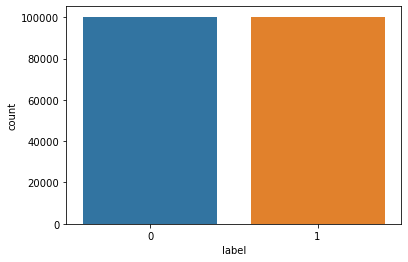

In [12]:
sns.countplot(x = df['label'], label = "Count") 

Kode diatas digunakan untuk menampilkan count yang divisualkan dengan barchart pada dataframe label 

<AxesSubplot:>

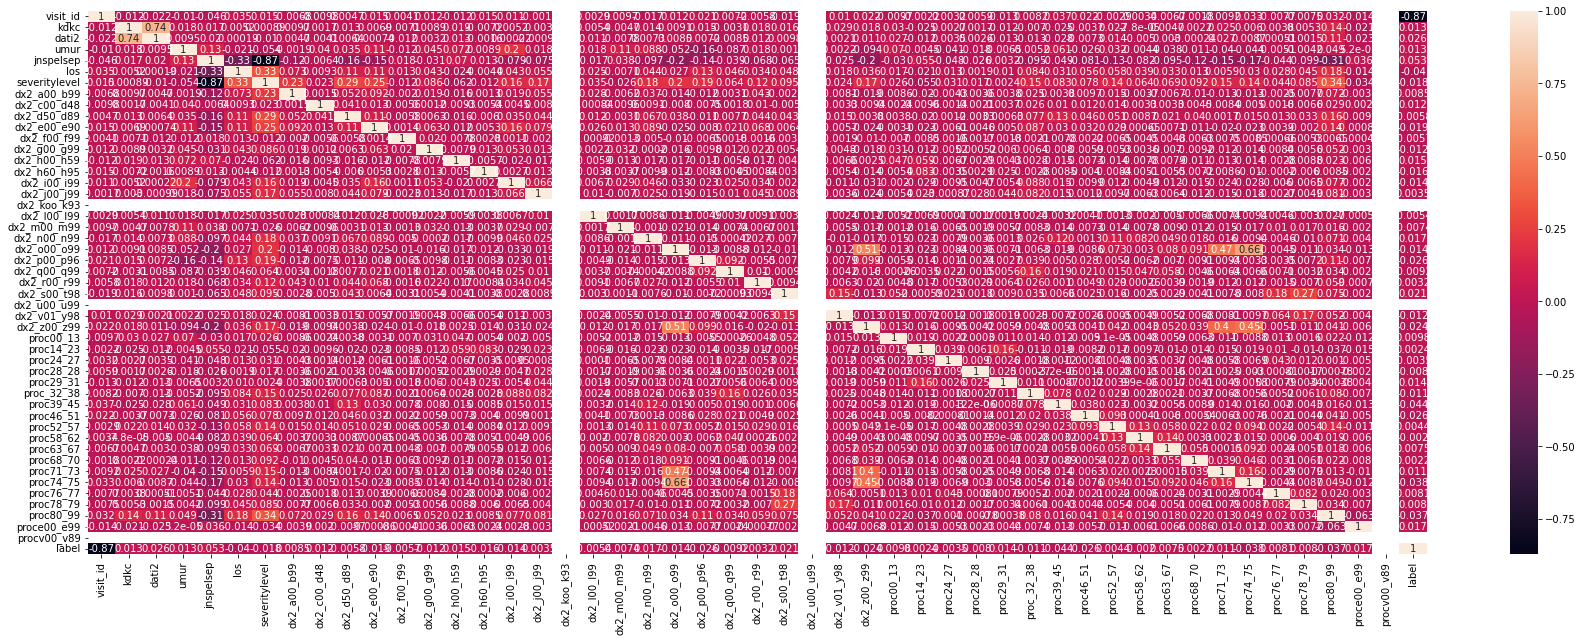

In [13]:
plt.figure(figsize=(30,10)) 
sns.heatmap(df.corr(), annot=True) 

Kode diatas digunakan untuk menampilkan hubungan dua variabel dengan menggunakan correlation.  Masing masing pasangan data memiliki korelasi yang beragam, yang ditampilkan melalui heatmap

Label as pie chart:


Text(0, 0.5, '')

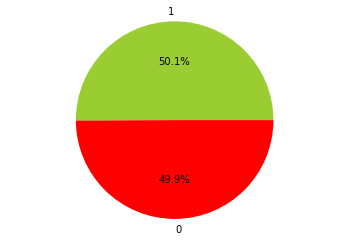

In [14]:
print("Label as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(df.label.value_counts(),autopct='%1.1f%%', labels=['1','0'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

Kode diatas digunakan untuk melakukan visualisasi berupa perbandingan antara fraud dan nonfraud dengan menggunakan pie chart

#### Tahapan 4 : Data Preprocessing

In [15]:
df.head(10)

,visit_id,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,...,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
0,1,1107,150,SB,P,64,2,0,F,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1303,200,C,L,45,1,9,E,3,...,0,0,0,0,0,0,4,0,0,1
2,3,1114,172,B,P,34,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
3,4,601,90,SC,L,34,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
4,5,1006,130,B,L,27,2,0,F,0,...,0,0,0,0,0,0,0,0,0,1
5,6,1016,117,SC,L,0,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
6,7,202,26,SC,L,73,1,3,L,1,...,0,0,0,0,0,0,0,0,0,1
7,8,2101,309,KM,P,64,2,0,H,0,...,0,0,0,0,0,0,1,0,0,1
8,9,1013,111,B,P,21,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
9,10,903,113,A,P,44,1,3,W,3,...,0,0,0,0,0,0,1,0,0,1


In [16]:
df_dropna = df.dropna()
print(df_dropna.shape)

(200217, 53)


Kode diatas merupakan fungsi drop missing value

In [17]:
df_dropna.isna().sum()

visit_id         0
kdkc             0
dati2            0
typeppk          0
jkpst            0
umur             0
jnspelsep        0
los              0
cmg              0
severitylevel    0
diagprimer       0
dx2_a00_b99      0
dx2_c00_d48      0
dx2_d50_d89      0
dx2_e00_e90      0
dx2_f00_f99      0
dx2_g00_g99      0
dx2_h00_h59      0
dx2_h60_h95      0
dx2_i00_i99      0
dx2_j00_j99      0
dx2_koo_k93      0
dx2_l00_l99      0
dx2_m00_m99      0
dx2_n00_n99      0
dx2_o00_o99      0
dx2_p00_p96      0
dx2_q00_q99      0
dx2_r00_r99      0
dx2_s00_t98      0
dx2_u00_u99      0
dx2_v01_y98      0
dx2_z00_z99      0
proc00_13        0
proc14_23        0
proc24_27        0
proc28_28        0
proc29_31        0
proc_32_38       0
proc39_45        0
proc46_51        0
proc52_57        0
proc58_62        0
proc63_67        0
proc68_70        0
proc71_73        0
proc74_75        0
proc76_77        0
proc78_79        0
proc80_99        0
proce00_e99      0
procv00_v89      0
label       

Kode diatas digunakan untuk menghitung nilai NaN pada dataframe

In [18]:
df_dropna.duplicated().sum()

0

Kode diatas digunakan untuk melakukan pemeriksaan apakah terdapat duplikat atau tidak

In [19]:
df_dropna['jkpst'].replace(to_replace=['L','P'], value = [0,1], inplace = True)

Kode diatas digunakan untuk mengubah value kategorikal dari jenis kelamin berupa L dan P menjadi Binary 

In [20]:
df_dropna['diagprimer'] = df_dropna['dx2_a00_b99'] + df_dropna['dx2_c00_d48'] + df_dropna['dx2_d50_d89'] + df_dropna['dx2_e00_e90'] + df_dropna['dx2_f00_f99'] + df_dropna['dx2_g00_g99']+ df_dropna['dx2_h00_h59'] + df_dropna['dx2_h60_h95'] + df_dropna['dx2_i00_i99']+ df_dropna['dx2_j00_j99'] + df_dropna['dx2_koo_k93'] + df_dropna['dx2_l00_l99'] + df_dropna['dx2_j00_j99'] + df_dropna['dx2_koo_k93'] + df_dropna['dx2_l00_l99'] + df_dropna['dx2_m00_m99'] + df_dropna['dx2_n00_n99'] + df_dropna['dx2_o00_o99'] + df_dropna['dx2_p00_p96']  + df_dropna['dx2_q00_q99'] + df_dropna['dx2_r00_r99'] + df_dropna['dx2_s00_t98'] + df_dropna['dx2_u00_u99'] + df_dropna['dx2_v01_y98'] + df_dropna['dx2_z00_z99']

Kode diatas digunakan untuk menyatukan value dari kolom diagprimer yang sumber dari masing masing tabel value tersebut

In [21]:
to_drop = ['visit_id','dx2_a00_b99', 'dx2_c00_d48', 'dx2_d50_d89', 'dx2_e00_e90', 'dx2_f00_f99', 'dx2_g00_g99', 'dx2_h00_h59', 'dx2_h60_h95', 'dx2_i00_i99', 'dx2_j00_j99', 'dx2_koo_k93', 'dx2_l00_l99', 'dx2_m00_m99', 'dx2_n00_n99', 'dx2_o00_o99', 'dx2_p00_p96', 'dx2_q00_q99', 'dx2_r00_r99', 'dx2_s00_t98', 'dx2_u00_u99', 'dx2_v01_y98', 'dx2_z00_z99','proc00_13','proc14_23','proc24_27','proc28_28','proc29_31','proc_32_38','proc39_45','proc46_51', 'proc52_57','proc58_62','proc63_67','proc68_70','proc71_73','proc74_75','proc76_77','proc78_79','proc80_99','proce00_e99','procv00_v89'] 
df_dropna.drop(to_drop, inplace=True, axis = 1)
df_dropna

,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,diagprimer,label
0,1107,150,SB,1,64,2,0,F,0,0,1
1,1303,200,C,0,45,1,9,E,3,5,1
2,1114,172,B,1,34,2,0,Q,0,0,1
3,601,90,SC,0,34,2,0,Q,0,0,1
4,1006,130,B,0,27,2,0,F,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
200212,2102,353,B,1,48,2,0,Z,0,0,0
200213,1308,212,SD,0,1,2,0,Q,0,0,0
200214,201,38,SB,1,3,2,0,Q,0,0,0
200215,1008,128,B,1,52,1,1,J,1,0,0


Kode diatas digunakan untuk menghapus kolom yang tidak diperlukan, karena kita akan melakukan aksi fraud detection yang cenderung menggunakan data binary, sehingga kolom yang memuat tipe data nominal atau object dilakukan drop

In [22]:
import numpy as np
# Numeric data type
data_num = df_dropna.select_dtypes(include=[np.number])

# Category data type
data_cat = df_dropna.select_dtypes(exclude=[np.number])

# Get dummies (data transformation)
transform_cat = pd.get_dummies(data_cat, prefix_sep='_', drop_first=True)

In [23]:
from numpy.core.defchararray import add
data_cat = transform_cat.assign(new=add('', np.arange(1, len(data_cat) + 1).astype(str)))
data_num = data_num.assign(new=add('', np.arange(1, len(data_num) + 1).astype(str)))
df_dropna = pd.concat([data_cat, data_num], axis=1)
df_dropna.drop(['new'], axis=1, inplace=True)

Kode diatas digunakan untuk transformasi data pada semua data kategorikal sehingga semua fitur memiliki nilai numerik.

In [24]:
df_dropna

,typeppk_B,typeppk_C,typeppk_D,typeppk_GD,typeppk_HD,typeppk_I1,typeppk_I2,typeppk_I3,typeppk_I4,typeppk_KB,...,cmg_Z,kdkc,dati2,jkpst,umur,jnspelsep,los,severitylevel,diagprimer,label
0,0,0,0,0,0,0,0,0,0,0,...,0,1107,150,1,64,2,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,1303,200,0,45,1,9,3,5,1
2,1,0,0,0,0,0,0,0,0,0,...,0,1114,172,1,34,2,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,601,90,0,34,2,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,1006,130,0,27,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200212,1,0,0,0,0,0,0,0,0,0,...,1,2102,353,1,48,2,0,0,0,0
200213,0,0,0,0,0,0,0,0,0,0,...,0,1308,212,0,1,2,0,0,0,0
200214,0,0,0,0,0,0,0,0,0,0,...,0,201,38,1,3,2,0,0,0,0
200215,1,0,0,0,0,0,0,0,0,0,...,0,1008,128,1,52,1,1,1,0,0


In [25]:
df_dropna['label'].value_counts()

1    100255
0     99962
Name: label, dtype: int64

In [26]:
non_fraud = df_dropna[df_dropna['label']==0]
fraud =  df_dropna[df_dropna['label']==1]

In [27]:
non_fraud.shape, fraud.shape

((99962, 55), (100255, 55))

In [28]:
non_fraud = non_fraud.sample(fraud.shape[0], replace=True)
non_fraud.shape

(100255, 55)

In [29]:
df_dropna = fraud.append(non_fraud, ignore_index = True).dropna()
df_dropna

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11972\1985386300.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_dropna = fraud.append(non_fraud, ignore_index = True).dropna()


,typeppk_B,typeppk_C,typeppk_D,typeppk_GD,typeppk_HD,typeppk_I1,typeppk_I2,typeppk_I3,typeppk_I4,typeppk_KB,...,cmg_Z,kdkc,dati2,jkpst,umur,jnspelsep,los,severitylevel,diagprimer,label
0,0,0,0,0,0,0,0,0,0,0,...,0,1107,150,1,64,2,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,1303,200,0,45,1,9,3,5,1
2,1,0,0,0,0,0,0,0,0,0,...,0,1114,172,1,34,2,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,601,90,0,34,2,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,1006,130,0,27,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200505,0,0,0,0,0,0,0,0,0,0,...,0,1112,169,1,71,1,3,1,2,0
200506,1,0,0,0,0,0,0,0,0,0,...,0,105,3,0,28,1,2,2,1,0
200507,0,0,0,0,0,0,0,0,0,0,...,0,2102,354,1,61,1,5,1,2,0
200508,0,0,0,0,0,0,0,0,0,0,...,0,1112,168,1,32,1,4,2,4,0


In [30]:
df_dropna['label'].value_counts()

1    100255
0    100255
Name: label, dtype: int64

#### Tahapan 5 : Create Training & Test Dataset (Data Cleaning)

In [31]:
X = df_dropna.drop('label', axis = 1)
y = df_dropna['label']

Kode diatas merupakan Feature Selection utk menentukan Input maupun Target Features

In [32]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler(feature_range=(0, 1)).fit_transform(X)

Perubahan skala pada setiap fitur dengan menggunakan normalisasi sehingga setiap nilai berada pada skala di antara 0-1.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train.shape, X_test.shape

((180459, 54), (20051, 54))

Kode diatas digunakan untuk membagi dataset menjadi menjadi training data dan test data

In [34]:
X_train.shape, X_test.shape

((180459, 54), (20051, 54))

In [35]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02702703, 1.        ,
        0.2       ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00506757, 0.33333333,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.13333333]])

In [36]:
# Buat objek scaler
scaler = StandardScaler()
# Sesuaikan scaler dengan data
X_train = scaler.fit_transform(X_train)
# Mengubah data train dan test
X_test = scaler.transform(X_test)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

Scaling standardisasi berfokus pada mengubah data mentah menjadi informasi yang dapat digunakan
sebelum dianalisis.

In [37]:
X_train.shape

(180459, 54)

In [38]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [39]:
X_train.shape, X_test.shape

((180459, 54, 1), (20051, 54, 1))

In [40]:
X_train[0].shape

(54, 1)

In [41]:
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = (54, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 53, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 53, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 53, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 52, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 52, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 52, 64)            0

In [42]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [43]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
5640/5640 [==============================] - 34s 6ms/step - loss: 0.6845 - accuracy: 0.5486 - val_loss: 0.6712 - val_accuracy: 0.5907
Epoch 2/10
5640/5640 [==============================] - 36s 6ms/step - loss: 0.6752 - accuracy: 0.5675 - val_loss: 0.6611 - val_accuracy: 0.6025
Epoch 3/10
5640/5640 [==============================] - 35s 6ms/step - loss: 0.6709 - accuracy: 0.5765 - val_loss: 0.6595 - val_accuracy: 0.6071
Epoch 4/10
5640/5640 [==============================] - 37s 7ms/step - loss: 0.6693 - accuracy: 0.5796 - val_loss: 0.6594 - val_accuracy: 0.6041
Epoch 5/10
5640/5640 [==============================] - 35s 6ms/step - loss: 0.6676 - accuracy: 0.5811 - val_loss: 0.6532 - val_accuracy: 0.6148
Epoch 6/10
5640/5640 [==============================] - 37s 7ms/step - loss: 0.6657 - accuracy: 0.5827 - val_loss: 0.6537 - val_accuracy: 0.6099
Epoch 7/10
5640/5640 [==============================] - 36s 6ms/step - loss: 0.6648 - accuracy: 0.5857 - val_loss: 0.6517 - val_ac

Kode diatas digunakan untuk melakukan compile serta fit model 

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1,  random_state=0)
print('X_val', X_val.shape)

X_val (18046, 54, 1)


#### Tahapan 7 : Evaluate the Model

In [45]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
loss_v, accuracy_v = model.evaluate(X_val, y_val, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

564/564 [==============================] - 1s 2ms/step - loss: 0.6500 - accuracy: 0.6143
Validation: accuracy = 0.614319  ;  loss_v = 0.650035
Test: accuracy = 0.622862  ;  loss = 0.648350


Kode diatas digunakan untuk menampilkan evaluasi perbandingan antara Loss dan Accuracy dari model CNN

627/627 [==============================] - 1s 2ms/step


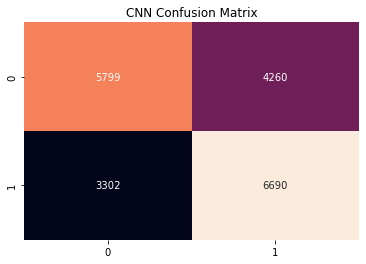

In [46]:
y_pred_cnn = model.predict(X_test)
y_pred_cnn = np.round(y_pred_cnn).astype(int)
cm = confusion_matrix(y_test, y_pred_cnn)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('CNN Confusion Matrix')
plt.savefig('cnn_con_mat')
plt.show()

In [47]:
print(classification_report(y_test, y_pred_cnn))
print('precision_score:',precision_score(y_test,y_pred_cnn))
print('accuracy_score:',accuracy_score(y_test,y_pred_cnn))
print('recall_score:',recall_score(y_test,y_pred_cnn))

              precision    recall  f1-score   support

           0       0.64      0.58      0.61     10059
           1       0.61      0.67      0.64      9992

    accuracy                           0.62     20051
   macro avg       0.62      0.62      0.62     20051
weighted avg       0.62      0.62      0.62     20051

precision_score: 0.6109589041095891
accuracy_score: 0.6228617026582215
recall_score: 0.6695356285028022


Kode diatas digunakan untuk menampilkan evaluasi kinerja dari model CNN

In [49]:
print("Number of fraud points in the testing dataset = ", sum(y_test))

Number of fraud points in the testing dataset =  9992


Kode diatas digunakan untuk menghitung total fraud yang terdapat pada test data